In [2]:
#initialization 
import matplotlib.pyplot as plt
import numpy as np

#ignore deprecation warnings because they are annoying (not recommened generally)
from warnings import simplefilter 
simplefilter(action='ignore', category=DeprecationWarning)

# Importing standard Qiskit libraries
from qiskit import *
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.quantum_info import *
from qiskit.circuit.library import *
from ibm_quantum_widgets import *

# Section 1: Perform operations on quantum circuits


**qubit** – qubit to measure: Qubit or QuantumRegister or int or slice or Sequence of Qubits or ints

**cbit** – classical bit to place the measurement in:  Clbit or ClassicalRegister or int or Sequence of Qubits or ints

In [3]:
NUM_QUBITS = 2
# let's construct a multi-qubit quantum register
qr = QuantumRegister(NUM_QUBITS, 'q')

qc = QuantumCircuit(qr, name='my-circuit')
# let's create a Bell's state
qc.h(0)
qc.cx(0,1)
qc.measure_all()
qc.draw()

┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1

In [4]:
# let's construct a multi-bit classical register
cr = ClassicalRegister(NUM_QUBITS, 'c')
qc = QuantumCircuit(qr, cr, name='my-circuit')
# explicitly measure qubits [0,1] into classical bits [0,1]
qc.measure(qr, cr)
# alternatively: qc.measure([0,1], [0,1])
qc.draw()

┌─┐   
q_0: ┤M├───
     └╥┘┌─┐
q_1: ─╫─┤M├
      ║ └╥┘
c: 2/═╩══╩═
      0  1

**NOTE:** measure_all() method adds measurement to all qubits AND adds new classical bits in a ClassicalRegister to store these measurements by default. If add_bits=False, the results of the measurements will instead be stored in the already existing classical bits

## Single and multi-qubit gates

We are not going to go through basic gates in detail. The reader is expected to be familiar with those. If you are not sure what $X$ or $Z$ gates are you should probably first go through the first two chapters of Qiskit textbook.

In the following we will create circuits for the 4 Bell states. Bell states are 2 qubit states which are known as maximally entangled states. Note though, that these are different from the states of equal superposition of all basis states which you get, for example, by applying a $H$ gate to each qubit in circuit. Secondly note that there are multiple ways in which you can create the Bell state. This is obvious, for example, if you think that you can always replace a sequence of gates $HX$ by $ZH$. For further details refer to Qiskit gate identities.

In [5]:
# Bell state 0
bell_0 = QuantumCircuit(2)
bell_0.h(0)
bell_0.cx(0,1)

sv = Statevector.from_label('00')
#evolve the initial state through the circuit
sv_bell1 = sv.evolve(bell_0) 
sv_bell1.draw('latex')  

<IPython.core.display.Latex object>

In [6]:
# Bell state 1
bell_1 = QuantumCircuit(2)
bell_1.x(0)
bell_1.h(0)
bell_1.cx(0,1)

sv = Statevector.from_label('00')
#evolve the initial state through the circuit
sv_bell2 = sv.evolve(bell_1) 
sv_bell2.draw('latex')

<IPython.core.display.Latex object>

In [7]:
# Bell state 2
bell_2 = QuantumCircuit(2)
bell_2.x(0)
bell_2.h(1)
bell_2.cx(1,0)

sv = Statevector.from_label('00')
#evolve the initial state through the circuit
sv_bell3 = sv.evolve(bell_2) 
sv_bell3.draw('latex')

<IPython.core.display.Latex object>

In [8]:
# create the last remaining Bell state on your own
bell_3 = QuantumCircuit(2)

### ADD CODE BELOW
bell_3.x(0)
bell_3.x(1)
bell_3.h(1)
bell_3.cx(1,0)
### DON'T ADD CODE BELOW

sv = Statevector.from_label('00')
#evolve the initial state through the circuit
sv_bell3 = sv.evolve(bell_3)
sv_bell3.draw('latex')

<IPython.core.display.Latex object>

In [9]:
# state of equal superposition of basis states
max_sp = QuantumCircuit(2)
max_sp.h(0)
max_sp.h(1)

sv = Statevector.from_label('00')
# evolve the initial state through the circuit

### ADD CODE BELOW
sv_ev = sv.evolve(max_sp)
sv_ev.draw('latex')
### DON'T ADD CODE BELOW

<IPython.core.display.Latex object>

## Circuit barier

Despite the common use of barier as a visual tool to separate different parts of circuit, **QuantumCircuit.barrier** is actually an instruction for the transpiler. Transpiler uses different optimizations to improve the performance. For exaxmple, it utilizes gate identities to reduce the depth of the circuit. Two Hadamard gates will be composed into an identity gate if they are not separated by a barier. By placing a barier between two gates you enforce the transpiler to only perform optimizations on different sides of the barier. For more info take a look at this [video](https://www.youtube.com/watch?v=tS2CMOyWFMQ) by Qiskit.

**NOTE:** QuantumCircuit.barrier(*args) takes **qargs** as an argument, that is you can specify which qubits you want to apply the barier to. By default barier is applied to all qubits in circuit.

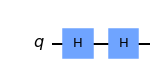

In [10]:
qc = QuantumCircuit(1)
qc.h(0)
qc.h(0)
qc.draw('mpl')

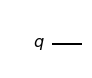

In [11]:
backend = BasicAer.get_backend('qasm_simulator')
qc = QuantumCircuit(1)
qc.h(0)
qc.h(0)
transpile(qc, backend=backend).draw('mpl')

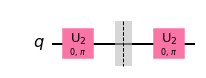

In [12]:
backend = BasicAer.get_backend('qasm_simulator')
qc = QuantumCircuit(1)
qc.h(0)
qc.barrier()
qc.h(0)
transpile(qc, backend=backend).draw('mpl')

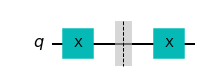

In [13]:
# try it out yourself with different gates: instead of Hadamard, try Pauili gates
my_qc = QuantumCircuit(1)
### ADD CODE BELOW
my_qc.x(0)
my_qc.barrier()
my_qc.x(0)
### DON'T ADD CODE BELOW
transpile(my_qc, backend=backend).draw('mpl')
# did you get what you expected?

## Circuit depth

Circuit depth returns the length of critical path in the circuit. It is a metric that calculates the longest path between the input and the output.

**NOTE:** The single argument is **filter_function** – a function to filter out some instructions. Should take as input a tuple of (Instruction, list(Qubit), list(Clbit)). By default filters out “directives”, such as barrier or snapshot.

In [14]:
qc = QuantumCircuit(1)
qc.x(0)
qc.depth()

1

In [15]:
qc = QuantumCircuit(2)
qc.x([0,1])
qc.x(1)
qc.depth()
# draw the circuit yourself to see why the depth has increased now

### ADD CODE BELOW
qc.draw()
### DON'T ADD CODE BELOW

┌───┐     
q_0: ┤ X ├─────
     ├───┤┌───┐
q_1: ┤ X ├┤ X ├
     └───┘└───┘

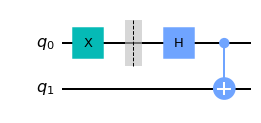

In [16]:
qc = QuantumCircuit(2)
qc.x(0)
qc.barrier(0)
qc.h(0)
qc.cx(0,1)
qc.depth()
# draw the circuit yourself to see why the depth has increased now
# hint: the longest path is not always the lenth of the longest sequence along one channel
qc.draw('mpl')
# the second qubit only has a CX gate applied to it, but has to "wait" for the first qubit to provide the control
# also, barier doesn't count

# Section 2: Executing experiments

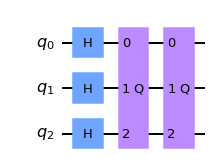

In [17]:
# in the following we will use the implementation of Grover's algorithm in Qiskit
from qiskit.algorithms import Grover, AmplificationProblem

# let's construct an oracle with a single solution
sv = Statevector.from_label('010')
problem = AmplificationProblem(oracle=sv)

grover = Grover(iterations=2).construct_circuit(problem=problem)

# the original circuit contains unitaries
# transpile the circuit in terms of basis gates to see what it is "made of"
t_grover = transpile(grover, basis_gates=['cx', 'u3'])
t_grover.draw('mpl', fold=-1)

# draw the original cicuit yourself
grover.draw('mpl', fold=-1)

In [18]:
# lets's try to evolve the initial state through the circuit like we have done for Bell states
sv = Statevector.from_label('000')
sv_ev = sv.evolve(grover)
sv_ev.draw('latex')
# it is obvious from statevector evolutions, that the state 010
# has the best chances to be measured, as desired

<IPython.core.display.Latex object>

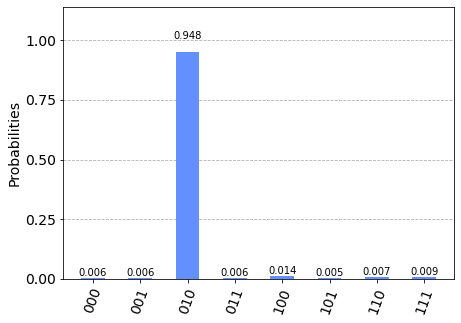

In [19]:
# now let's obtain the same result from the QASM simulation
# for that we need to measure the qubits in the end of our circuit
grover.measure_all()

backend= BasicAer.get_backend('qasm_simulator')
job = execute(grover, backend, shots=1024)
result = job.result()
plot_histogram(result.get_counts())

In [20]:
# finally let's see how our circuit performs on actual hardware
# you will need your IBM Quantum account
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')

# sometimes you might need to wait when running on real devices
# let's monitor the status of our job
from qiskit.tools import job_monitor

# to call a real backend let's pick the least busy one, which satisfies out requirments
from qiskit.providers.ibmq import least_busy

suitable_devices = provider.backends(filters = lambda b: b.configuration().n_qubits >= 3
                                                        and not b.configuration().simulator
                                                        and b.status().operational==True)

backend = least_busy(backends=suitable_devices)
print("We are runnig our circuit on ", backend)

#job = execute(grover, backend=backend)
#job_monitor(job)

We are runnig our circuit on  ibmq_quito


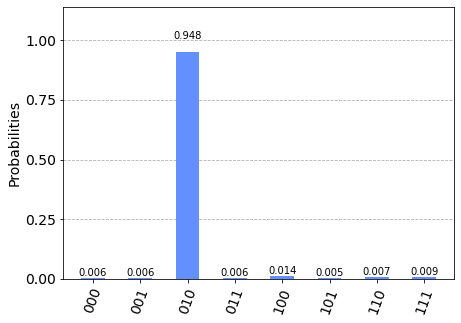

In [21]:
# we see that results from a real device also match our expectations
# the algorithm successfully finds the marked string
result = job.result()
counts = result.get_counts()

### ADD CODE BELOW
# plot the histogramm yourself
plot_histogram(counts)
### DON'T ADD CODE BELOW

# Section 3: Implement QASM

QASM is a programming language for circuit based quantum computers. Let's see how we can convert a circuit in Qiskit to QASM strings and back. For more detail refer to this nice [video](https://www.youtube.com/watch?v=wG94YHKDIxc) by Qiskit or to the [documentation](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.qasm.html). 

In [22]:
# let's again use our transpiled Grover circuit to demonstarte the idea

# Notice: QASM doesn't look "nice". This is a low-level language which can be understood by quantum hardware.
# If you want to take a look at the QASM code make sure to specify 'formatted=True' which makes the code readable by a human being.
t_grover.qasm(formatted=True)

OPENQASM 2.0;
include "qelib1.inc";
qreg q[3];
u3(pi/2,-pi/4,-pi) q[0];
u3(pi/2,0,pi) q[1];
cx q[1],q[0];
u3(0,0,pi/4) q[0];
u3(pi/2,0,pi) q[2];
cx q[2],q[0];
u3(0,0,pi/4) q[0];
cx q[1],q[0];
u3(0,0,-pi/4) q[0];
u3(0,0,pi/4) q[1];
cx q[2],q[0];
u3(pi/2,0,0) q[0];
cx q[2],q[1];
u3(0,0,pi/4) q[1];
cx q[2],q[1];
u3(pi/2,0,0) q[1];
u3(pi/2,0,-pi/4) q[2];
cx q[1],q[2];
u3(0,0,-pi/4) q[2];
cx q[0],q[2];
u3(0,0,pi/4) q[2];
cx q[1],q[2];
u3(0,0,pi/4) q[1];
u3(0,0,-pi/4) q[2];
cx q[0],q[2];
cx q[0],q[1];
u3(0,0,pi/4) q[0];
u3(0,0,-pi/4) q[1];
cx q[0],q[1];
u3(pi/2,3*pi/4,-pi) q[0];
u3(pi/2,-pi,-pi) q[1];
cx q[1],q[0];
u3(0,0,pi/4) q[0];
u3(pi/2,-pi,-3*pi/4) q[2];
cx q[2],q[0];
u3(0,0,pi/4) q[0];
cx q[1],q[0];
u3(0,0,-pi/4) q[0];
u3(0,0,pi/4) q[1];
cx q[2],q[0];
u3(pi/2,0,0) q[0];
cx q[2],q[1];
u3(0,0,pi/4) q[1];
cx q[2],q[1];
u3(pi/2,0,0) q[1];
u3(pi/2,0,-pi/4) q[2];
cx q[1],q[2];
u3(0,0,-pi/4) q[2];
cx q[0],q[2];
u3(0,0,pi/4) q[2];
cx q[1],q[2];
u3(0,0,pi/4) q[1];
u3(0,0,-pi/4) q[2];
cx q[0],q

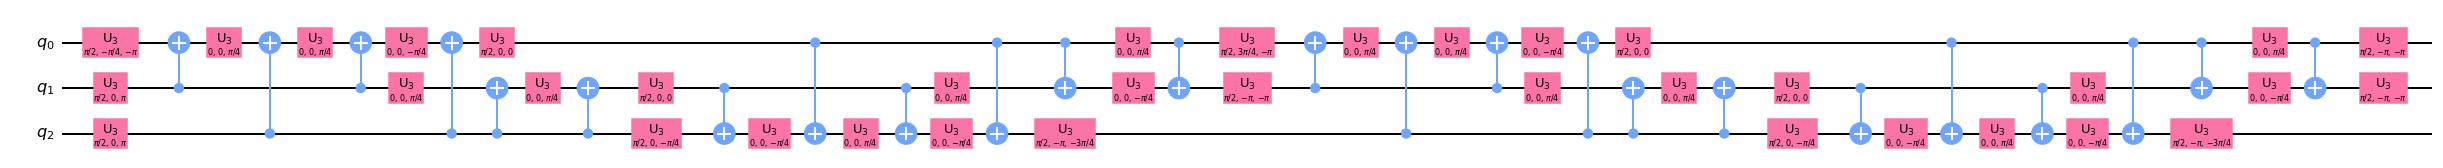

In [23]:
# store the circuit to a file in the follwing way
qasm_code = t_grover.qasm(filename='grover.qasm')

# to get the circuit back from QASM file execute the following
my_qc = QuantumCircuit.from_qasm_file('grover.qasm')
my_qc.draw('mpl', fold=-1)

# Section 4: Operators and fidelity

## Operators

The Operator class is used in Qiskit to represent matrix operators acting on a quantum system. You can build an Operator from a matrix, convert a Gate or a QuantumCircuit to an Operator or compose an Operator from a bunch of smaller Operaotrs.

In [24]:
# let's create an arbitrary Operator from a matrix
A = np.array([[0,1,0], [1,0,0], [0,1,1]])
op = Operator(A)
# Operator contains information about its matrix representation and input and output dimensions
op

Operator([[0.+0.j, 1.+0.j, 0.+0.j],
          [1.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 1.+0.j]],
         input_dims=(3,), output_dims=(3,))

In [25]:
# create an Operator from a circuit yourself
qc = QuantumCircuit(2)
qc.h([0,1])
qc.cx(0,1)

op = Operator(qc)
op

Operator([[ 0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j],
          [ 0.5+0.j, -0.5+0.j, -0.5+0.j,  0.5+0.j],
          [ 0.5+0.j,  0.5+0.j, -0.5+0.j, -0.5+0.j],
          [ 0.5+0.j, -0.5+0.j,  0.5+0.j, -0.5+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))

You can compose Operators into larger Operators using tensor product (look up Kronecker product) or tensor expansion (which is just a tensor product in the reversed order).

In [26]:
A = Operator(Pauli(label='X'))
B = Operator(Pauli(label='Z'))
A.expand(B) # B x A 

Operator([[ 0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j],
          [ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
          [ 0.+0.j,  0.+0.j, -0.+0.j, -1.+0.j],
          [ 0.+0.j,  0.+0.j, -1.+0.j, -0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))

In [27]:
A = Operator(Pauli(label='X'))
B = Operator(Pauli(label='Z'))
A.tensor(B) # result A x B

Operator([[ 0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j],
          [ 0.+0.j, -0.+0.j,  0.+0.j, -1.+0.j],
          [ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
          [ 0.+0.j, -1.+0.j,  0.+0.j, -0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))

You can compose a smaller operator with a selection of subsystems on a larger operator using the qargs kwarg of compose method.

In [28]:
III = Operator(np.eye(2 ** 3))
XX = Operator(Pauli(label='XX'))
XIX = III.compose(XX, qargs=[0,2])
XIX # the resulting operator is X x I x X

Operator([[0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2, 2), output_dims=(2, 2, 2))

In [62]:
# compose an XIXZ Operator from IIII and XX and Z Operators
### ADD CODE BELOW
IIII =  Operator(np.eye(2 ** 4))
XX = Operator(Pauli(label='XX'))
Z = Operator(Pauli('Z'))
XIXI = IIII.compose(XX, qargs=[1,3])
XIXZ = XIXI.compose(Z, qargs=[0])
### DON'T ADD CODE BELOW
print(XIXZ)

Operator([[ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j,  0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j,  0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j,  0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j,  0.+0.j, -1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j,  0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
            1.+0.j,  0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j,  0.+0.j,  0.+0.j

## Fidelity 

Fidelity is a measure of the "closeness" of two quantum states. For pure states the definition reduces to the squared overlap between the states. For example, if one of the states is a basis state, fidelity can be interpreted as the probability that measuring the second state will result in this basis state. For impure states, the definition is omre complex.

In [30]:
# with Qiskit you can find the state fidelity between two quantum states

# let's investigate Bell states
state_fidelity(sv_bell3, sv_bell1)

0.0

In [31]:
basis_state_00 = Statevector.from_label('00')
state_fidelity(basis_state_00, sv_bell1)

0.4999999999999999

In [32]:
basis_state_00 = Statevector.from_label('00')
state_fidelity(basis_state_00, sv_bell3)

0.0

Can you explain the results above?

## Process fidelity

Process fidelity is different from state fidelity. It tell you how close two quantum channels are to each other. Process fidelity does not depend on the global phase.

In [33]:
# let's find process fidelity of X and H Operators
op_1 = Operator([[0,1],[0,1]])
op_2 = Operator([[1,1],[1,-1]])/np.sqrt(2)

F = process_fidelity(op_1, op_2)
F

Input channel is not TP. Tr_2[Choi] - I has non-zero eigenvalues: [-1.  1.]


0.0

In [34]:
# what about fidelity of X Operator with itself multiplied with a complex phase
op_1 = Operator([[0,1],[0,1]])
op_2 = op_1*np.exp(0.5j)
# calculate the process fidelity yourself

### ADD CODE BELOW
F = process_fidelity(op_1, op_2)
F
### DON'T ADD CODE BELOW

# as you expected, the fidelity is independent of global phase

c:\Users\ivash\OneDrive\Рабочий стол\SS 22\Qiskit Certification\qiskit-cert-workbook\venv\lib\site-packages\qiskit\quantum_info\operators\measures.py:381: UserWarning: Treating array input as a Operator object
  warnings.warn(f"Treating array input as a {fallback_class.__name__} object")
Input channel is not TP. Tr_2[Choi] - I has non-zero eigenvalues: [-1.  1.]
Target channel is not TP. Tr_2[Choi] - I has non-zero eigenvalues: [-1.  1.]


1.0

# Section 5: Display system information

In [35]:
# encountered a compatibility error? Check which version of Qiskit you are using
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.20.2', 'qiskit-aer': '0.10.4', 'qiskit-ignis': '0.7.1', 'qiskit-ibmq-provider': '0.19.1', 'qiskit-aqua': '0.7.5', 'qiskit': '0.36.2', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [36]:
# display the entire version table
%qiskit_version_table

In [37]:
# Let's have an overview information on all the IBMQ backends that are available
%qiskit_backend_overview

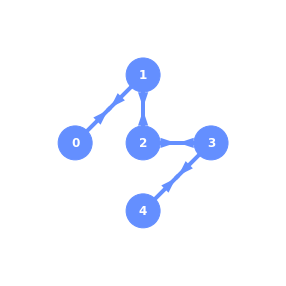

In [38]:
# now let's pick one device and investigate it 
from qiskit.visualization import plot_gate_map
backend = provider.get_backend('ibmq_bogota')

plot_gate_map(backend, plot_directed=True)

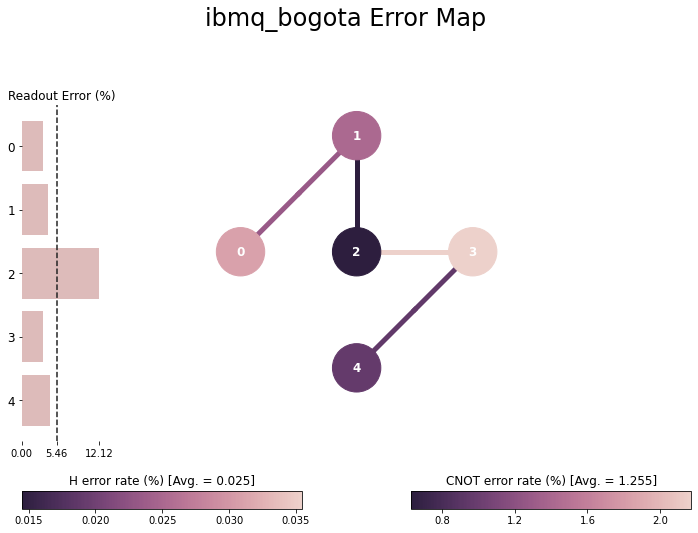

In [39]:
plot_error_map(backend)

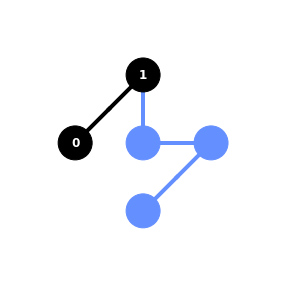

In [40]:
# let's plot the layout of our Bell state circuit transpiled for our target backend
transpiled_bell = transpile(bell_0, backend=backend)
plot_circuit_layout(transpiled_bell, backend=backend)

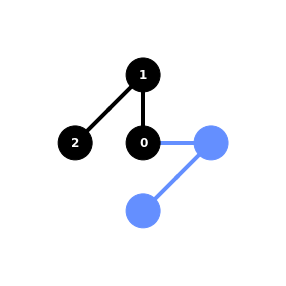

In [41]:
# display the layout of transpiled Grover's circuit on our target backend
transpiled_grover = transpile(grover, backend=backend)
plot_circuit_layout(transpiled_grover, backend=backend)

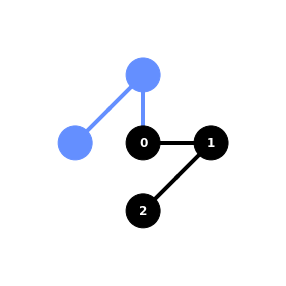

In [42]:
# what if we want to specify a custom mapping of our circuit qubits to device qubits?
# let's create an initial layout
initial_layout = [2,3,4] # virtual to physical: virtual qubits are ordered
transpiled_qc = transpile(grover, backend=backend, initial_layout=initial_layout)
plot_circuit_layout(transpiled_qc, backend=backend)

# Section 6: Construct visualizations

## Draw a circuit

Till this point we have alaways used the **matplotlib** drawer to display our circuits. Let's see how other drawers look like:

In [43]:
# for example, let's draw our Bell's state circuit in text mode
bell_0.draw('text')

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

There are plenty of ways to customize the output. For exmaple, display qubits in reversed order:

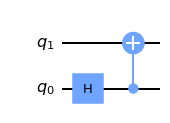

In [44]:
# qubits in reversed order
bell_0.draw('mpl', reverse_bits=True)

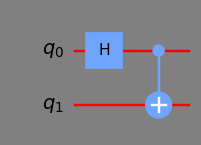

In [45]:
# More customization
style = {'linecolor': 'red', 'backgroundcolor': 'grey'}
bell_0.draw('mpl',scale = 1.2, style=style, fold=-1)

## Viualizing a State

In many situations you would like to see the state of your quantum system. There is a bunch of ways to visualize a quantum state. A standard way of plotting a quantum system is using the Bloch vector. This only works for a single qubit and takes as input the Bloch vector given in cartesian or spherical coordinates.

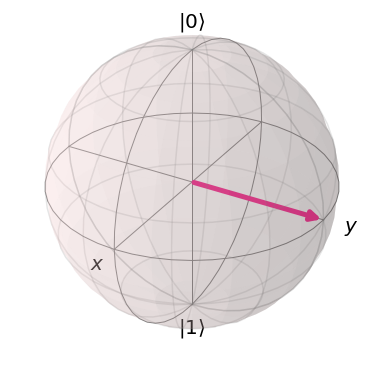

In [46]:
plot_bloch_vector([0,1,0])

## Viualizing a Multiqubit State

Just like a single qubit state, you can plot a multi qubit state as well. As an example let's again consider our first Bell state.

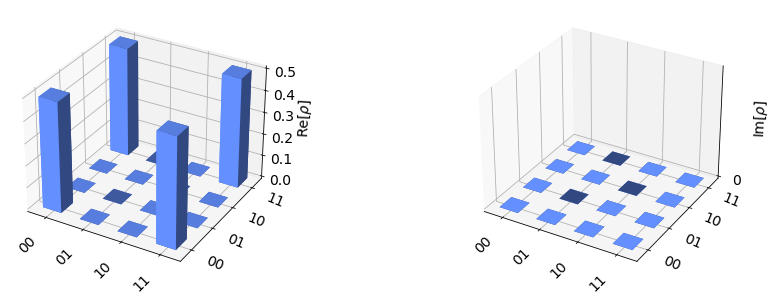

In [47]:
plot_state_city(bell_0)
# to understand why the 'city' looks like this consider the density matrix of this state

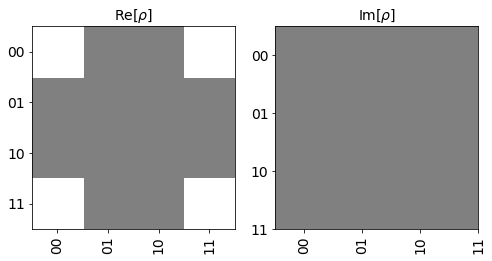

In [48]:
plot_state_hinton(bell_0)

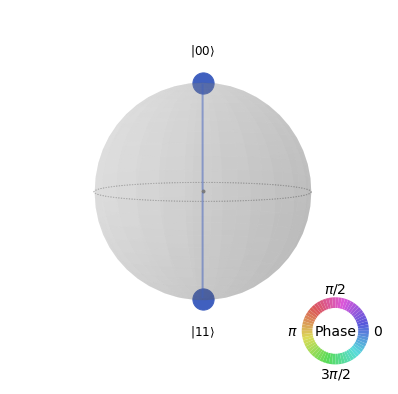

In [49]:
plot_state_qsphere(bell_0)

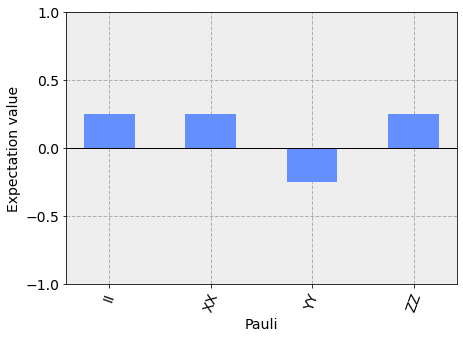

In [50]:
plot_state_paulivec(bell_0)

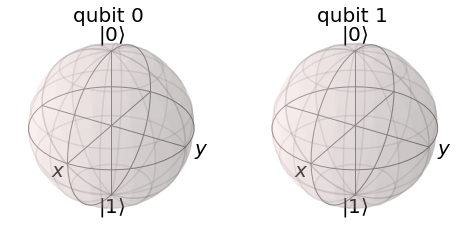

In [51]:
plot_bloch_multivector(bell_0)
# here, the bloch spheres represent maximally entangled qubits as zero-length vectors. Hence, no arrows.

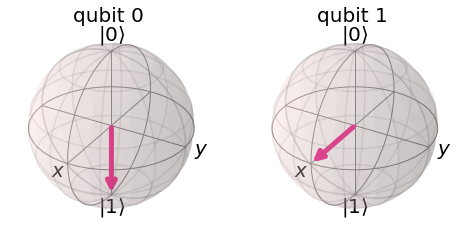

In [52]:
# a more informative example
psi = Statevector.from_label('+1')
plot_bloch_multivector(psi)
# the first qubit is in state |1>
# the second qubit is in the superposition of |0> and |1>

Just like for plotting QuantumCircuit, there is a bunch of options to customize the rendering of your state visualization. Take a look at [this](https://qiskit.org/documentation/tutorials/circuits/2_plotting_data_in_qiskit.html) Qiskit chapter for more details.

## Density matrix

For a pure state $|\phi\rangle$ the density matrix is constructed din the following way $\rho = |\phi\rangle\langle\phi|$ 

In [53]:
rho = DensityMatrix.from_instruction(bell_0)
rho.draw('latex', prefix='\\rho_{Bell_0} = ')

<IPython.core.display.Latex object>

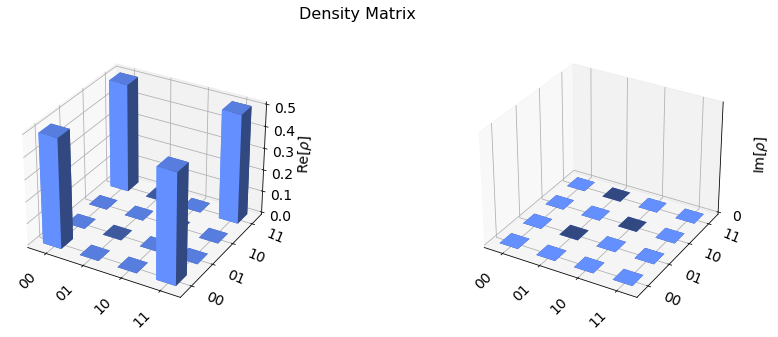

In [54]:
plot_state_city(rho.data, title='Density Matrix')

In [61]:
# prepare a density matrix for the state of the equal superposition of 2 basis states
my_qc = QuantumCircuit(2)
my_qc.h([0,1])
my_rho = DensityMatrix.from_instruction(my_qc)
my_rho.draw('latex', prefix='\\rho_{equal} = ')

<IPython.core.display.Latex object>

In [56]:
# prepare a density matrix for a mixed one-qubit state in an equal mixture of |0> and |1>

### ADD CODE BELOW
my_rho_M = np.array([[0.5, 0], [0, 0.5]])
my_rho = DensityMatrix(my_rho_M)
my_rho.draw('latex', prefix='\\rho_{mixture} = ')
### DON'T ADD CODE BELOW

<IPython.core.display.Latex object>

# Section A: Additional topics

## Toffoli Gate

CCX gate, also known as Toffoli gate. It is also known as the "controlled-controlled-not" gate. If the first two bits are both set to 1, it inverts the third bit, otherwise all bits stay the same.

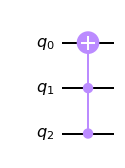

In [57]:
qr = QuantumRegister(3, name='q')
qc = QuantumCircuit(qr)
qc.ccx(control_qubit1=qr[1], control_qubit2=qr[2], target_qubit=qr[0])
qc.draw('mpl')

In [58]:
# Toffoli gate has the following matrix representation for the above configuration
matrix = Operator(qc).data
array_to_latex(matrix, prefix="CCX = ")

<IPython.core.display.Latex object>

## SWAP Gate

The SWAP gate is two-qubit operation. Expressed in basis states, the SWAP gate swaps the state of the two qubits involved in the operation.

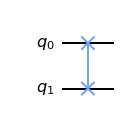

In [59]:
qr = QuantumRegister(2, name='q')
qc = QuantumCircuit(qr)
qc.swap(qubit1=qr[0], qubit2=[1])
qc.draw('mpl')

In [60]:
# SWAP gate has the following matrix representation for the above configuration
matrix = Operator(qc).data

# display the matrix in latex
array_to_latex(matrix, prefix="SWAP = ")

<IPython.core.display.Latex object>